In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [34]:
df=pd.read_csv('london_merged.csv',parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [35]:
print('데이터 구조는":' ,df.shape)
print('데이터의 타입은:',df.dtypes)
print('데이터의 컬럼은', df.columns)



데이터 구조는": (17414, 10)
데이터의 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 컬럼은 Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


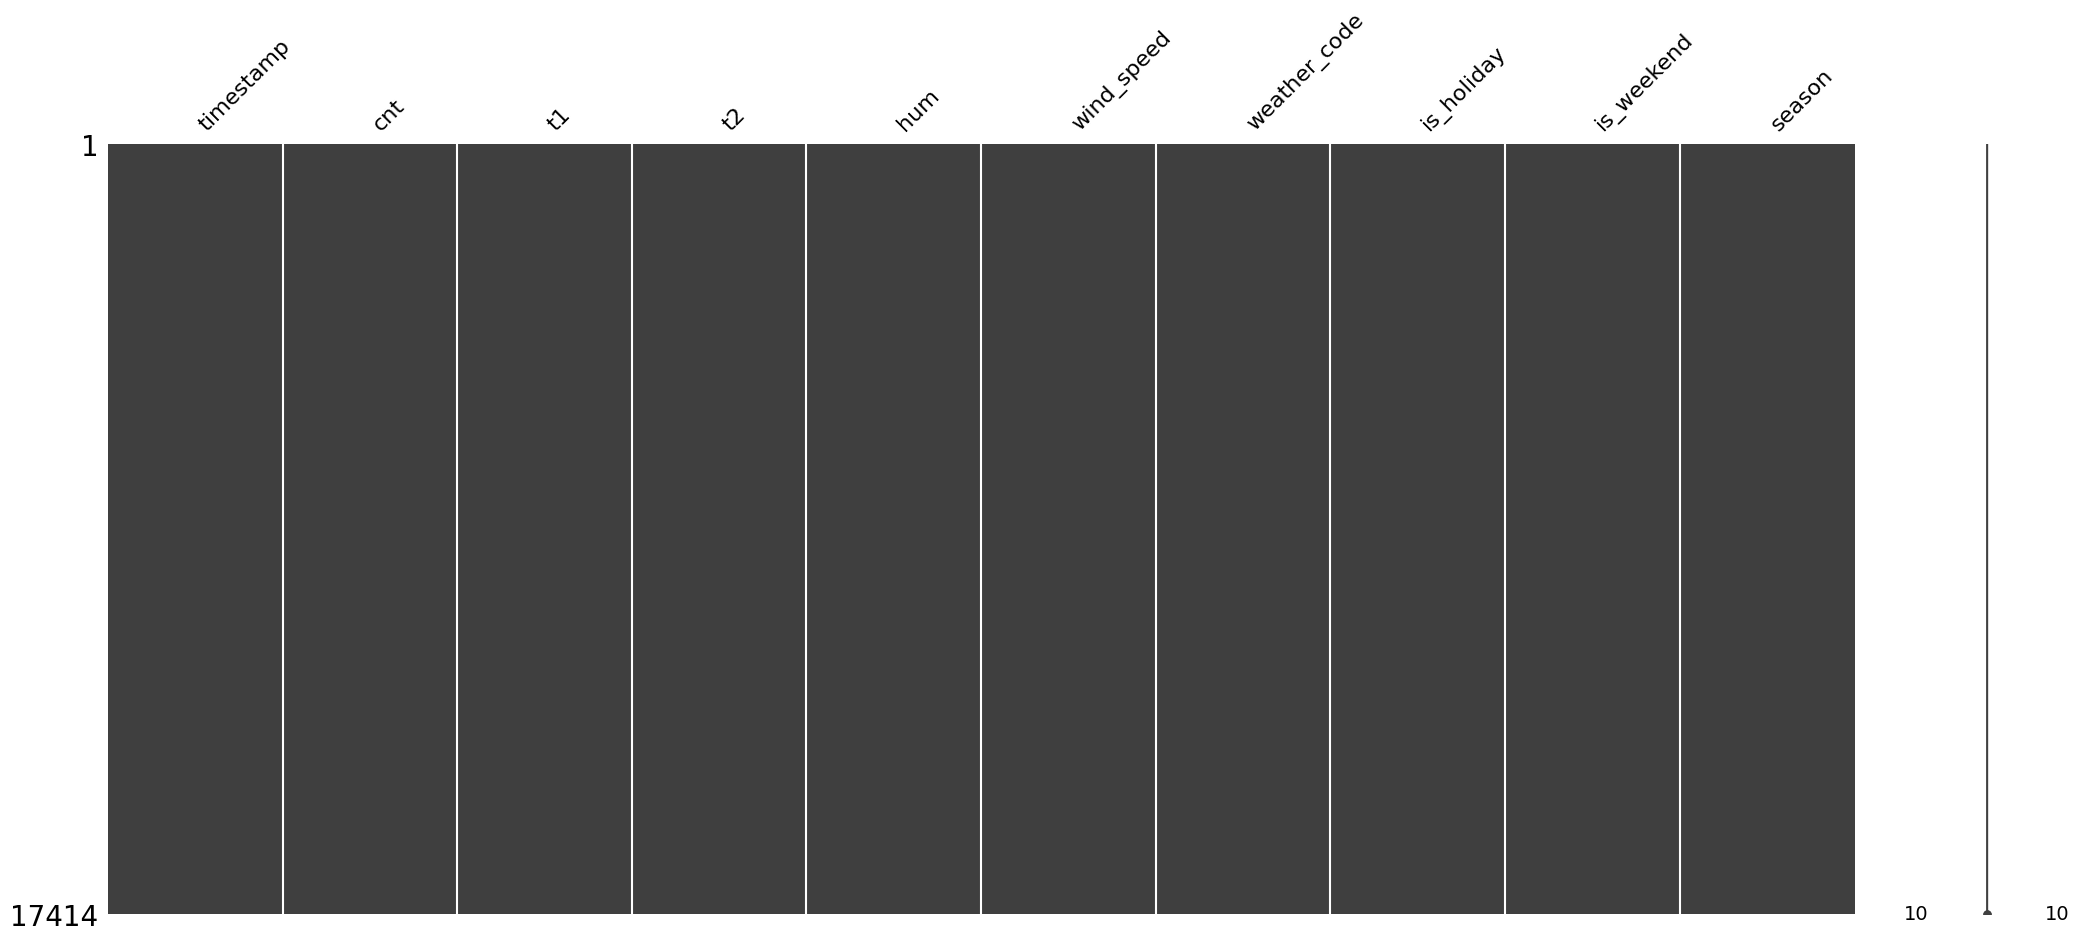

In [36]:
# 각 컬럼별 결측치 -> null인 부분이 없어서 아마 00000
df.isna().sum()

# msno.matrix는 대규모 데이터 세트에서 누락된 데이터의 패턴을 빠르게 시각적으로 분석하는 데 매우 유용
msno.matrix(df)
plt.show()

```
## df
  ### pandas 'DataFrame'(2차원 레이블-행렬) 객체를 나타냄
  ### df['열이름'] 같이 특정열에 접근하는데 사용
  ```
```
## dt
  ### pandas에서 날짜와 시간관련 데이터를 다루기 위한 접근자
  ### series 객체에서 호출될수 있으며 datatime 타입일때 사용됩니다
  ```

In [37]:



# df['이름'] 새로운 컬럼을 생성 -> year, month, dayofweek를 생성
df['year']=df['timestamp'].dt.year
df['month']=df['timestamp'].dt.month
df['dayofweek']=df['timestamp'].dt.dayofweek
df['hour']=df['timestamp'].dt.hour

df.head()


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [38]:
df['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

### boxplot: 데이터 분포와 이상치를 시각화 하는데 사용

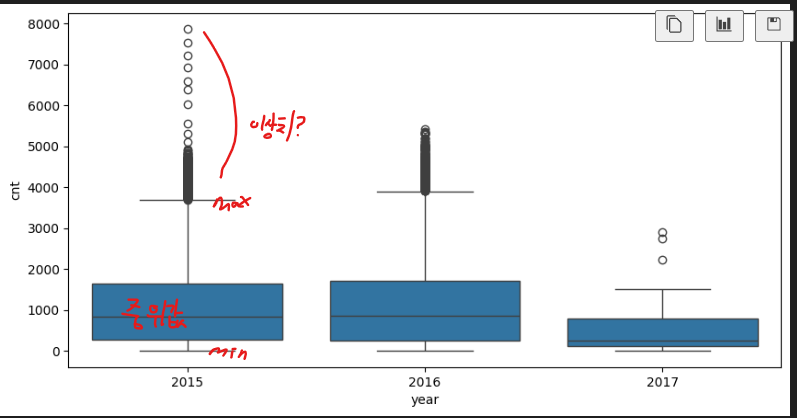

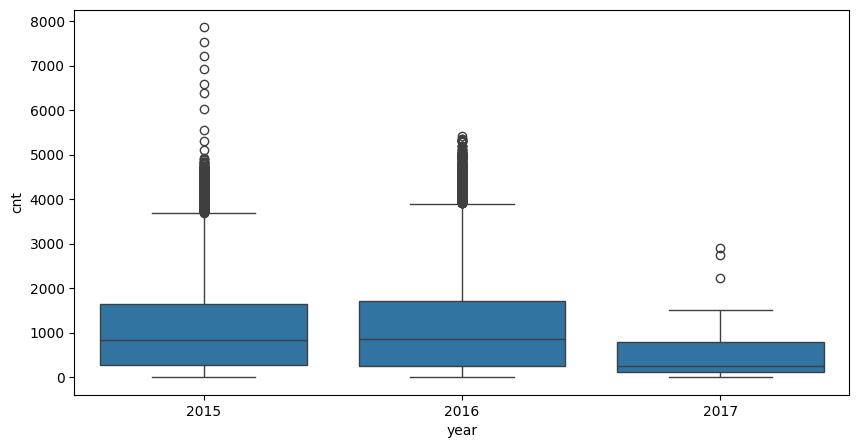

In [39]:
#  plt.subplots
# 하나이상의 그래프를 포함할수 있는 figure 객체 하나 또는 여러개의 Axes 객체 생성
# 1,1: 하나의 행과 열로 구성된 그래프 격자를 만든다는 의미 
    # -> 결과적으로는 하나의 Axes를 생성
# figsize: 그래프 크기
a, b = plt.subplots(1, 1, figsize=(10, 5)) 

# seaborn의 boxplot 함수
#  대부분의 인자들이 키워드로 명시되어야 함
#  sns.boxplot(df['year'], df['cnt']) => 이렇게 쓰면 오류남

# boxplot: 데이터 분포와 이상치를 시각화 하는데 사용 
#b라는 Axes위에 박스플롯을 그리라는 의미
sns.boxplot(x=df['year'], y=df['cnt'], ax=b)  #year: 년도 , cnt: 자전거 이용객
# sns.barplot(x=df['year'], y=df['cnt'], ax=b)  #year: 년도 , cnt: 자전거 이용객
# sns.barplot(x='year',y='cnt', data=df)

plt.show()

In [40]:
# case1 
# df['year']: DataFrame에서 직접적으로 열을 선택 
# 열의 이름을 문자열로 전달하는 것이 아니라 열자체를 직접 참조
# sns.boxplot(x=df['year'], y=df['cnt'], ax=b)  

# case2

# sns.barplot(x=feature,y='cnt', data=data,palette='Set3',orient='v')

# 그래프 함수 만들기
def plot_bar(data,feature):
    fig=plt.figure(figsize=(12,3))
    # df(csv)데이터를 이용해 hour데이터의 barplot 작성
    sns.barplot(x=feature,y='cnt', data=data,palette='Set3',orient='v')
   

C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\1664292366.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature,y='cnt', data=data,palette='Set3',orient='v')


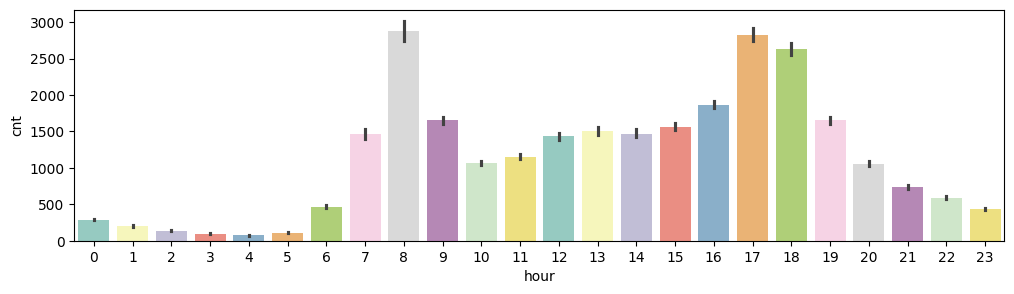

In [41]:
plot_bar(df,'hour')

## 시그마 이상치 제거

>>> 위에서 구한 위아래 이상치 0.3%로=> 정규분표포로 보면 양 끝간 0.3%로씩 제거(박스플롯으로 보면 min,max 벗어난 이상치 제거)<br><br>
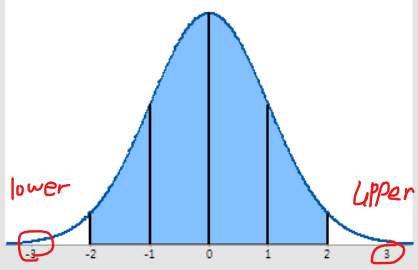
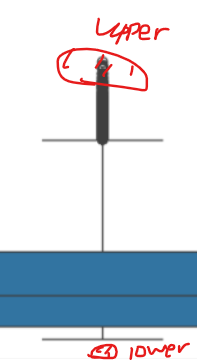

In [42]:
# 아웃라이어 제거
def is_outlier(s):
    lower_limit=s.mean()-(s.std()*3) # 평균의 3배 뺀값 (이상치)
    upper_limit=s.mean()+(s.std()*3)# 평균의 3배 더한값 (이상치)
    return ~s.between(lower_limit,upper_limit)

### groupby
>>> 그룹화 기준을 설정할 때는 괄호 ()를 사용하고, 특정 열을 선택할 때는 대괄호 []를 사용합니다.<br>
>>> df.groupby('그룹화할 열 이름')[특정열 선택]

In [43]:
# 시간대별 이용객수를 그룹화 해서
# is_outlier(이상치 제거함수)에 적용해서 df_out에 대입
df_out=df[~df.groupby('hour')['cnt'].transform(is_outlier)]  

print("이상치 제거전:" , df.shape)
print("이상치 제거후:" ,df_out.shape)

# 결과
# 이상치 제거전: (17414, 14) # 각각 행렬의 개수를 의미
# 이상치 제거후: (17265, 14)

이상치 제거전: (17414, 14)
이상치 제거후: (17265, 14)


## 결측치와 이상치 모두 확인을해야함

In [44]:
df_out.dtypes


timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int32
month                    int32
dayofweek                int32
hour                     int32
dtype: object

<!-- 중간정리 -->

#### 계절 1:겨울 2: 봄 등  데이터를 카테고리 형으로 변환하는 과정
  >>> .astype('category')로 형변환

In [45]:
# df_out는 이상치 제거된 data로 이제부터 이것을 이용할것

df_out['weather_code']=df_out['weather_code'].astype('category')
df_out['season']=df_out['season'].astype('category')
df_out['year']=df_out['year'].astype('category')
df_out['month']=df_out['month'].astype('category')
df_out['hour']=df_out['hour'].astype('category')





C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\3878613433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['weather_code']=df_out['weather_code'].astype('category')
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\3878613433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['season']=df_out['season'].astype('category')
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\3878613433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [46]:
print(df_out.dtypes)
df_out['hour']

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int32
hour                  category
dtype: object


0         0
1         1
2         2
3         3
4         4
         ..
17409    19
17410    20
17411    21
17412    22
17413    23
Name: hour, Length: 17265, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

### 원 핫 인코딩
카테고리화된(범주형) 데이터에대한 이진 변수를 생성하는 기법

#### ex 빨강 녹색  파랑을 나타낸다고 가정하면
```
빨강 녹색  파랑
1     0     0
0     1     0
0     0     1
```
#### -------------------------------
#### 원-핫 인코딩 사용하는 이유
1. 모델 호환성: 많은 머신러닝 알고리즘은 숫자 입력을 요구하기 때문
2. 우연한 순서나 중요도를 모델이 잘못 학습하는것을 방지

In [47]:
# get_dummies: 범주형을 수치형 데이터로 변환하기 위해서

df_out=pd.get_dummies(df_out,columns=['weather_code','season','year','month','hour']) 
 # 다시 돌리면 오류날수밖에 없음 이미 실행된 코드라 weather_code등의 칼럼이 나뉘었기 때문

In [48]:
df_out.head()


,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,True,...,False,False,False,False,False,False,False,False,False,False


## 위에 과정을 정리해보면
>>> #### 1. season, weather_code등 category로 변경 ()
 >>>df_out['season']=df_out['season'].astype('category') 코드로 변경


<br>

>>> #### 2. 각 category화 된 칼럼을 pd.get_dummies()로 이진화(수치형 데이터로 변환) 
>>> ( 밑에 사진처럼 칼럼의 개수가 늘어남 )
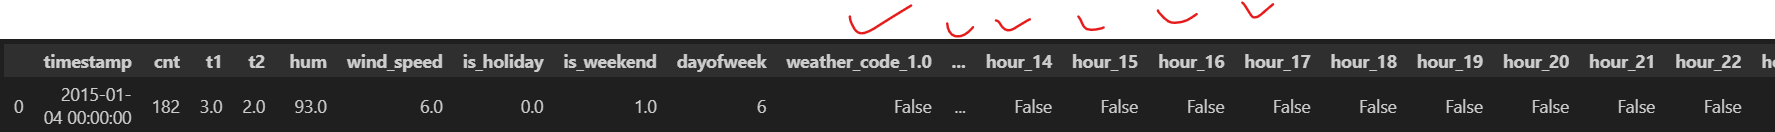



### 독립변수와 종속변수를 분리

#### 독립변수
  >>> 모델이 예측을 수행하는데 사용하는 입력데이터
  >>> 종속변수에 영향을 미칠수 있는 특성
  >>> ex) 여기선 날씨, 시간, 계절등이 존재
#### 종속변수
  >>> 예측하거나 분석하려는 주요 관심 대상
  >>> ex) 여기선 cnt(자전거 대여 횟수)같은 값을 의미

In [49]:
# 종속변수 df_y : 모델이 예측하려는 종속변수(여기선 cnt라는 칼럼)
df_y= df_out['cnt']

# 독립변수 df_x:  cnt(종속변수)와  timestamp 칼럼을 제거한 모든 열            /////-> timestamp(우리가 시간을 찍으려고 만들었던 칼럼임)
df_x= df_out.drop(['timestamp','cnt'],axis=1)  # axis=1 열방향으로 데이터 제거한다는 의미


df_x.head() # cnt,timestamp 제거된 모든 칼럼 출력
df_y.head() # cnt




0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

x,y 분리완료
### 마지막 단게:  훈련용이랑 테스트 분리과정

이유:수학시험을 치기전에 문제집을 받앗는데 천문제 , 문제집으로 시험보고 문제집만 보면 당연히 잘보지
하지만 랜덤 700개로만 공부하고 랜덤 300개중에 시험을 치면 학습이 잘됏는지 확인이 가능 -> 이렇게 분리하는 과정이 필요하기 때문

In [50]:
# 훈련용 , 테스트용 데이터 분리

from sklearn.model_selection import train_test_split

# df_x: cnt,timestamp 제거된 모든 칼럼(독립변수)
# df_y: cnt (종속변수)

x_train, x_test,y_train, y_test=train_test_split(df_x,df_y,random_state=66,test_size=0.3,shuffle=False)
#  옵션설명
 # random_state: 같은 시드값으로 섞으면 매번동일한 결과를 얻음
 # test_size: 훈련, 테스트 비율설정 0.3:0.7로 각각 변수에 대입됌
 # shuffle: 데이터는 원본 순서대로 분할된다. : 시계열이므로 안섞이게 false로 설정
    # | shuffle-true인 경우: 데이터가 무작위로 섞여 각 분할에 데이터가 고르게 분포되도록 함(훈련과정에 편향을 줄이고 일반화 성능을 높이는데 도움이 됨)

In [51]:
print(df_out.shape)
# 70대 30 비율로 x y가 나뉨
print('x_train의 구조는',x_train.shape)  # 70% , 독립변수 학습
print('y_train의 구조는',y_train.shape) # 70% , 종속변수 학습
print('x_test의 구조는',x_test.shape) # 30% , 독립변수 학습
print('y_test 구조는',y_test.shape) # 30% , 종속변수 학습


(17265, 59)
x_train의 구조는 (12085, 57)
y_train의 구조는 (12085,)
x_test의 구조는 (5180, 57)
y_test 구조는 (5180,)


# 딥러닝  keras

In [52]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential # 딥러닝 층을쌓아서 하는 방식으로 진행할것임
from keras.layers import Dense
from keras.callbacks import EarlyStopping  # 중간에 과적합이 되지 않도록 사용하는 라이브러리



### Dense 레이어
 
``` 1. 가장 기본적인 신경망 층 중 하나 ``` <br>
``` 2. 모든 입력노드가 다음층의 모든 노드와 연결되어 있는 구조```


### Dense 레이어의 주요 구성 요소

 ```  1. units: 해당층에 존재하는 뉴런(노드)의 수 지정 (층의 출력 차원 결정) ```
       <br>

 ```  2. activation: 뉴런 출력에 적용되는 활성화 함수 정의```  
 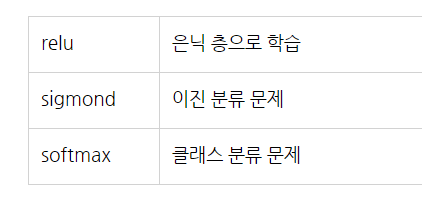 
 활성화 함수 종류 사진
   <br>
   <br>
   <br>
 >  활성화 함수는 뉴런의 출력을 비선형으로 만들어 신경망이 복잡한    <br>
    문제를 해결 가능하게 도움   <br> <br>
    ex> relu: 가장 널리 사용되는 활성화 함수중 하나
    : 입력이 양수일 경우 그대로 출력, 음수일 경우 0을 출력한다


In [53]:
model= Sequential()
# 층을 쌓음
 
model.add(Dense(units=160,activation='relu',input_dim=57)) # 1층
model.add(Dense(units=60,activation='relu'))# 2층
model.add(Dense(units=20,activation='relu'))# 3층``

# 마지막층 - 시간대별 자전거 수요를 예측하는것 이므로 1개로 결과가 나와야함 -> units=1
model.add(Dense(units=1,activation='linear'))

c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 160)            │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 60)             │         9,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │         1,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,181 (78.83 KB)

 Trainable params: 20,181 (78.83 KB)

 Non-trainable params: 0 (0.00 B)

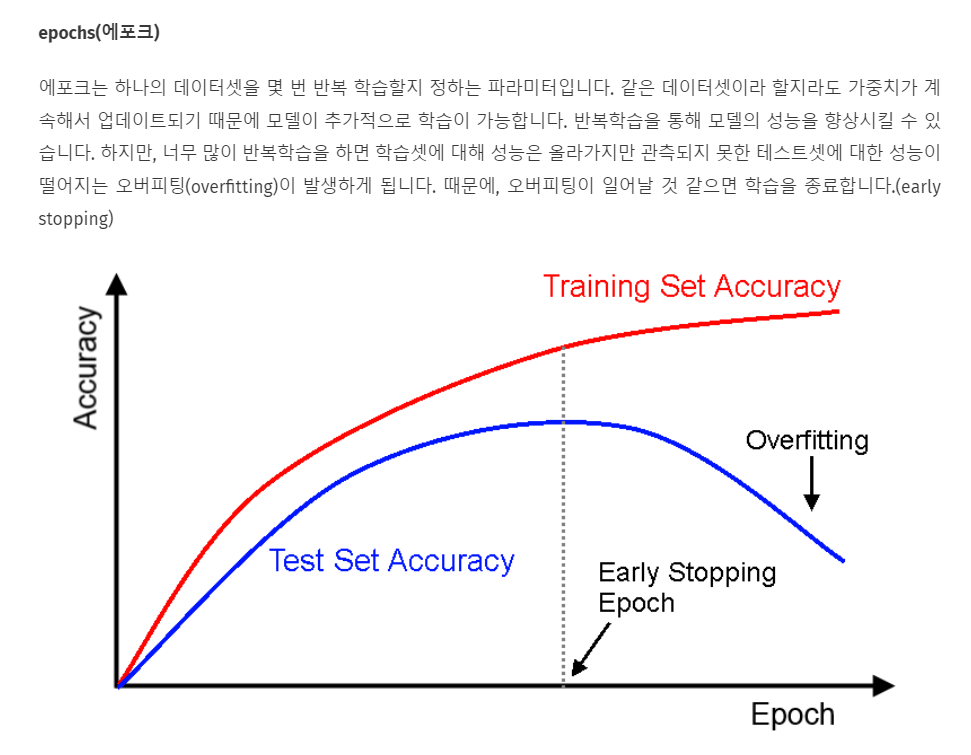

### 손실함수 (loss)
```1. 모델이 얼마나 잘못 예측했는지 측정하는 방법 ``` <br>
```2. 여기서 mae는 실제 값과 예측 값의 차이를 절대값으로 바꾼뒤 평균을 내는 방식```

### ____________________________
### 최적화 방법(optimizer)
```1.모델이 학습하는 방식을 결정 ``` <br>
```2. 신경망의 가중치를 조정하여 손실 함수의 값을 최소화 하거나 최적화 하는데 사용되는 방법 ```


<br>
## adam 

``` adam(Adaptive moment estimation): 기울기의 제곱에 대한 추정과 그라디언트 자체에 대한 추정을 모두 계산하여 가중치를 조정 ```
### ____________________________


### 성능지표(metrics)
```1.학습하는 동안 모델의 성능을 어떻게 체크할지 결정 ``` <br>
```2. 여기도 mae사용해 모델의 학습 능력을 계속 확인```

### 조기종료 earlyStropping: 
### 모델이 훈련데이터에 너무 잘맞춰져서, 성능이 안좋아지는 과적합 예방
### ________________________________________

### monitor
```1.어떤 값을 기준으로 성능을 평가할지 결정  ``` <br>
```2. 여기선 loss로 성능평가: 손실을 살펴보며 학습의 진행 상황 판단  ```
### ________________________________________

### patience
```1.모델의 성능이 개선되지 않을때 몇번의 학습(에폭)을 더 진행할지 설정  ```<br>
```2. 여기선 5로 5번의 성능개선이 안보여도 학습을 더 하도록 설정된것임 ```
### ________________________________________


### mode
```1.min으로 설정된 경우 monitor에서 설정된 값이 작아져야 한다는 의미  ```<br>
```2. loss를 ㄹ모니터링 할때 일반적으로 min을 설정: 왜냐면 손실값을 최소화 하는 모델```

### ________________________________________

### 작동원리
```1. 학습과정에서 매 에폭마다 손실을 체크한다```
```2. 만약 손실이 이전 최저 손실보다 작아지면, 그것이 새로운 최저 손실이 되는것```<br>
```3. 만약 손실이 계속 안 줄어들고 이전 최전 손실보다 더 낮아지지 않으면 patience에 설정된 에폭수만큼 기다림```<br>
```4. 그 기간동안에도 손실이 개선되지 않으면 학습을 멈춘다```<br>



### ________________________________________


history=model.fit(x_train,y_train,epochs=50, batch_size=1,validation_split=0.1,callbacks=[early_stopping])부분에 대한 설명


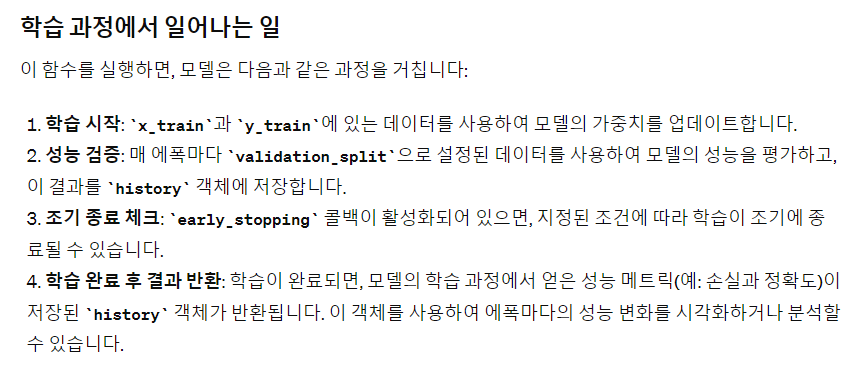

In [55]:

model.compile(loss='mae',optimizer='adam',metrics=['mae'])
early_stopping=EarlyStopping(monitor='loss',patience=5,mode='min')


# x_train: 70% , 독립변수 학습데이터
# y_train: 70% , 종속변수 학습데이터
# 신경망을 훈련시키는 fit 함수
#history=model.fit(x_train,y_train,epochs=50, batch_size=1,validation_split=0.1,callbacks=[early_stopping]) 
history=model.fit(x_train,y_train,epochs=50, batch_size=1,validation_split=0.1,callbacks=[early_stopping]) 


# 옵션 설명
# 1. epochs: 모델이 학습 데이터 셋을 전체적으로 50번 반복해 학습 (한번의 에폭: 전체 데이터 셋을 한번 통과하는 것을 의미) 
# 2. batch_size=1 : 학습데이터 셋에서 한번에 1개의 샘플씩 가중치를 업데이트하는데 사용된다.

# 3.validation_split=0.1:
## 70%의 훈련데이터 x_train에서도 10%를 검증 데이터로 분리하여 사용
## 모델이 학습하는 동안 성능을 검증하는 데 사용되며, 모델이 훈련데이터에 과적합되는걸 방지

# 4. callbacks=[early_stopping]: 콜백은 학습을 조기에 종료시키기 위해 사용


Epoch 1/5
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 619.4865 - mae: 619.4865 - val_loss: 395.9806 - val_mae: 395.9806
Epoch 2/5
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 329.3871 - mae: 329.3871 - val_loss: 289.5151 - val_mae: 289.5151
Epoch 3/5
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 11s 993us/step - loss: 247.5486 - mae: 247.5486 - val_loss: 203.3816 - val_mae: 203.3816
Epoch 4/5
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 10s 888us/step - loss: 210.6922 - mae: 210.6922 - val_loss: 242.4079 - val_mae: 242.4079
Epoch 5/5
10876/10876 ━━━━━━━━━━━━━━━━━━━━ 9s 853us/step - loss: 184.2337 - mae: 184.2337 - val_loss: 263.2140 - val_mae: 263.2140


# 1-8강 머신러닝 , 딥러닝

C:\Users\CONET-22\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\CONET-22\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


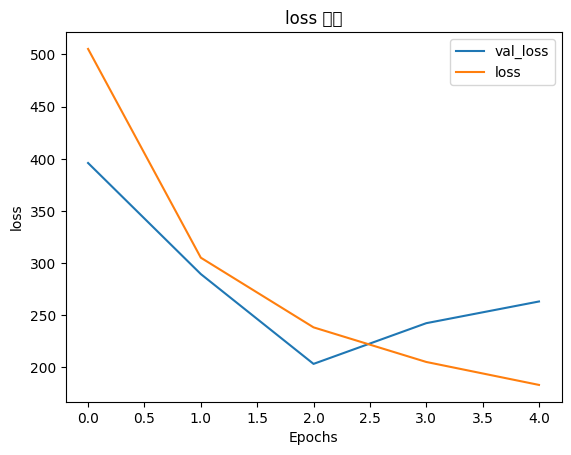

In [56]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss 비교')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss','loss'])
plt.show()



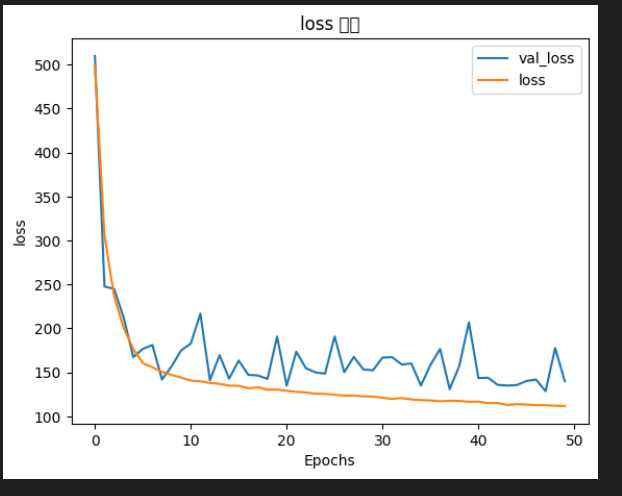

In [57]:
y_predict=model.predict(x_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step


In [58]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE:",RMSE(y_test,y_predict))


RMSE: 463.791688401291


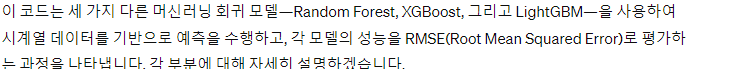

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=16)
rf.fit(x_train,y_train)
rf_result=rf.predict(x_test)
print('RMSE',RMSE(y_test,rf_result))

RMSE 303.6417775662534


In [60]:
from xgboost import XGBRegressor
xgb= XGBRegressor(n_eetimators=100, random_state=16)
xgb.fit(x_train,y_train)
xgb_result= xgb.predict(x_test)
print('RMSE',RMSE(y_test,xgb_result))



c:\Users\CONET-22\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:19:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_eetimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE 320.14419864156974


In [61]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train,y_train)
lgb_result=lgb.predict(x_test)
print('RMSE',RMSE(y_test,lgb_result))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 12085, number of used features: 55
[LightGBM] [Info] Start training from score 1077.863798
RMSE 323.2746495922864


# 1-9강 머신러닝, 딥러닝- 모형별 비교



In [62]:
# 메이비 각 모델별 모형을 비교하는게 아닐까?


xgb=pd.DataFrame(xgb_result)
rf=pd.DataFrame(rf_result)
dnn=pd.DataFrame(y_predict)
compare=pd.DataFrame(y_test).reset_index(drop=True)

In [63]:
compare['xgb'] =xgb
compare['rf'] =rf
compare['dnn']=dnn

compare.head()

,cnt,xgb,rf,dnn
0,1885,1763.592285,1700.24,1365.903931
1,2175,1931.741821,1803.82,1815.364624
2,2485,2800.010742,2191.37,2075.178223
3,2882,2865.234619,2206.67,2152.412598
4,2965,2500.403564,2276.35,2224.273193


C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\951827151.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['cnt'],shade=True,color='r')
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\951827151.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['xgb'],shade=True,color='b')
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\951827151.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(compare['rf'],shade=True,color='y')
C:\Users\CONET-22\AppData\Local\Temp\ipykernel_1372\951827151.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an erro

KeyError: 'lgb'

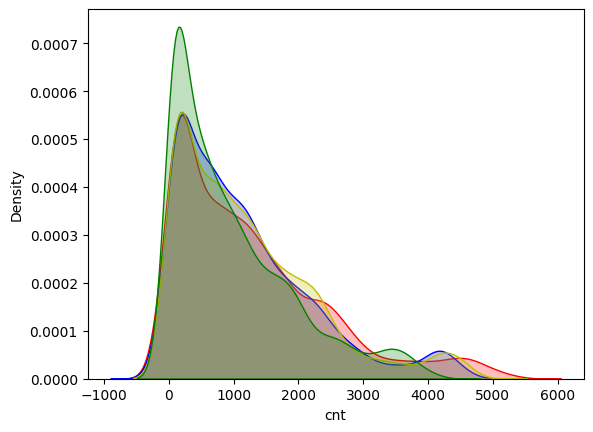

In [64]:
sns.kdeplot(compare['cnt'],shade=True,color='r')
sns.kdeplot(compare['xgb'],shade=True,color='b')
sns.kdeplot(compare['rf'],shade=True,color='y')
sns.kdeplot(compare['dnn'],shade=True,color='g')
sns.kdeplot(compare['lgb'],shade=True,color='ro')

